In [1]:
import os

import cv2
import pywt
import numpy as np
import panel as pn
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

pn.extension()

In [2]:
INPUT_JPG_IMAGES_DIR = 'input_jpg_images'
INPUT_GRAY_JPG_IMAGES_DIR = 'input_gray_jpg_images'
OUTPUT_JPG_IMAGES_DIR = 'output_jpg_images'

if not os.path.exists(INPUT_GRAY_JPG_IMAGES_DIR):
    os.makedirs(INPUT_GRAY_JPG_IMAGES_DIR)
if not os.path.exists(OUTPUT_JPG_IMAGES_DIR):
    os.makedirs(OUTPUT_JPG_IMAGES_DIR)

INPUT_JPG_IMAGES_FILEPATHS = tuple(
    os.path.join(INPUT_JPG_IMAGES_DIR, img_filename)
    for img_filename in os.listdir(INPUT_JPG_IMAGES_DIR)
    if img_filename.endswith('.jpg')
);

In [3]:
def get_comparison_figure(
    img_filepath=INPUT_JPG_IMAGES_FILEPATHS[0],
    levels=6,
    threshold=100
):
    img = cv2.imread(img_filepath)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    coeffs = pywt.wavedec2(img_gray, 'haar', level=levels)
    for i in range(1, len(coeffs)):
        coeffs[i] = (
            np.where(((coeffs[i][0] < -threshold) | (coeffs[i][0] > threshold)), coeffs[i][0], 0),
            np.where(((coeffs[i][1] < -threshold) | (coeffs[i][1] > threshold)), coeffs[i][1], 0),
            np.where(((coeffs[i][2] < -threshold) | (coeffs[i][2] > threshold)), coeffs[i][2], 0),
        )
    img_compressed = pywt.waverec2(coeffs, 'haar')
    
    gray_filename = f'{"".join(img_filepath.split(".")[:-1])}_grayscale.jpg'.split('/')[-1]
    gray_filepath = os.path.join(INPUT_GRAY_JPG_IMAGES_DIR, gray_filename)
    cv2.imwrite(gray_filepath, img_gray)
    
    compr_filename = f'{"".join(img_filepath.split(".")[:-1])}_compressed.jpg'.split('/')[-1]
    compr_filepath = os.path.join(OUTPUT_JPG_IMAGES_DIR, compr_filename)
    cv2.imwrite(compr_filepath, img_compressed)
    
    gray_file_size = os.stat(gray_filepath).st_size
    compr_file_size = os.stat(compr_filepath).st_size
    
    fig = Figure(figsize=(20, 8))
    
    ax = fig.add_subplot(121)
    ax.set_title(f'Original Grayscale ({gray_file_size} bytes)')
    ax.imshow(img_gray, 'gray')    
    
    ax = fig.add_subplot(122)
    ax.set_title(f'Compressed ({compr_file_size} bytes)')
    ax.imshow(img_compressed, 'gray')
        
    return fig

Column(width_policy='max')
    [0] Row
        [0] Column(sizing_mode='scale_both')
            [0] Select(name='img_filepath', options=['input_jpg_images/animal....], value='input_jpg_images/noisy_ta...)
            [1] IntSlider(end=9, name='levels', start=1, value=6)
            [2] IntSlider(end=250, name='threshold', value=100)
    [1] Row
        [0] Column(sizing_mode='scale_both')
            [0] Matplotlib(Figure, name='interactive00099')
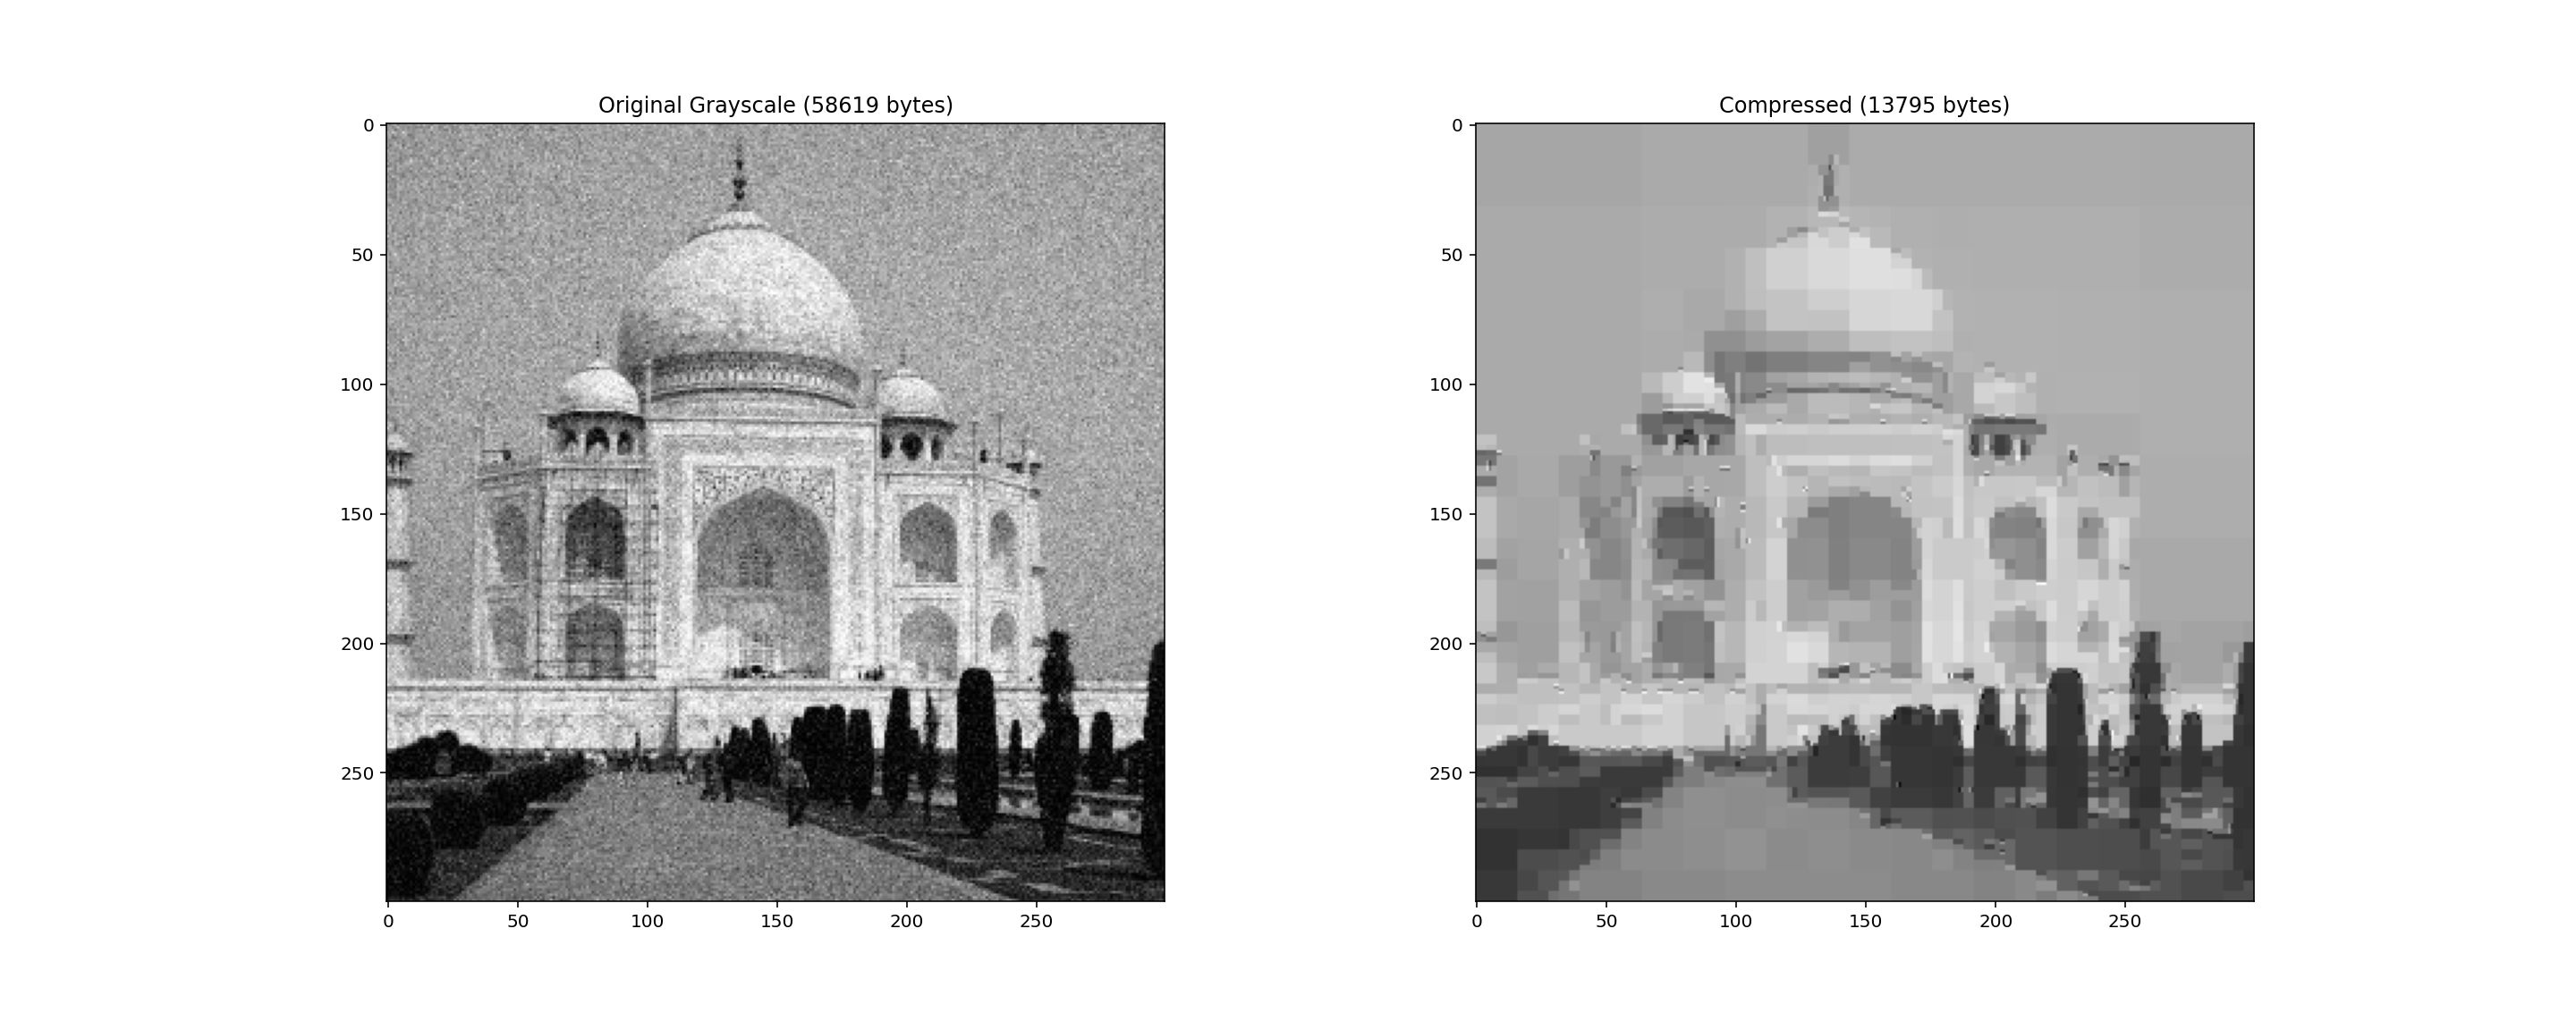

In [4]:
auto_panel = pn.interact(
    get_comparison_figure,
    img_filepath=sorted(INPUT_JPG_IMAGES_FILEPATHS),
    levels=(1, 9),
    threshold=(0, 250)
)

recomposed_panel = pn.Column(
    pn.Row(pn.Column(*auto_panel[0], sizing_mode='scale_both')),
    pn.Row(
        pn.Column(auto_panel[1][0], sizing_mode='scale_both')
    ),
    width_policy='max'
)

recomposed_panel